# < 4주차 >

* 원하는 구조의 CNN 구축
* 실전적 이미 데이터셋으로 분류 task 수행

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

* < Baseline > (복습)

In [ ]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320 , 10) ### : 알맞는 input은? 320

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [ ]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [ ]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-3-0ef5a5d22cfe>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311729
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.291758
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.275182
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.253064
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.216183
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.182399
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.142853
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.110931
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.982527
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.789588
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.656549
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.557455
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.120033
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.076231
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.727981
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.687579
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.614643
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.614161
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.678287
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.503730
Train Epoch: 1 [12800/60000 (

<ipython-input-6-6ed0d2a1801a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1730, Accuracy: 9503/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.175265
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.194009
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.186073
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.259791
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.360167
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.189313
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.114220
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.147490
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.186931
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.121458
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.271545
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.104074
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.186695
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.296114
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.168491
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.157172
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.191672
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.113140
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.132392
Train Epoch: 2 [12

# 4주차 과제 1 : CNN Structure 구현

* 3주차 과제 baseline 코드 바탕으로.
* 첨부한 이미지의 structure 구현.

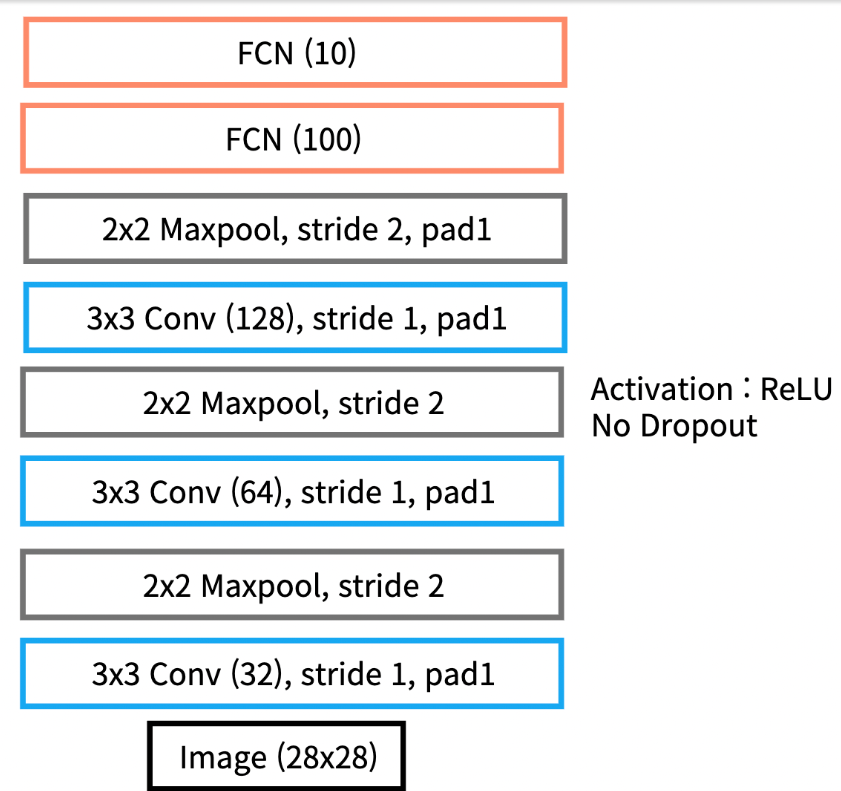

In [ ]:
class revised_Net(nn.Module):
    def __init__(self):
        super(revised_Net, self).__init__()

        self.relu = nn.ReLU() # 활성함수
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1) # Conv1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2) # maxpool
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1) # Conv2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1) # Conv3
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool2(x)
        x = self.relu(self.conv3(x))
        x = self.maxpool3(x)
        x = x.view(x.size(0), -1) # ???
        x = self.relu(self.fc1(x))
        x = self.fc2(x) # 마지막이니 softmax 바로 들어가니 relu 쓰지 않음.
        return F.log_softmax(x)

In [ ]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-32-7b425ad040bb>:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.297178
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.306352
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.304311
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.307454
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.312279
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.302015
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.308472
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.291905
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.300299
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.303285
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.294754
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.293308
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.291399
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.288337
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.296814
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.289887
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.289921
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.278924
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.286954
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.286486
Train Epoch: 1 [12800/60000 (

<ipython-input-33-252edfe1b05a>:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.2327, Accuracy: 9283/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.175835
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.189817
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.267089
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.253479
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.217898
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.126403
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.053639
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.184901
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.223633
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.134978
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.111354
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.162421
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.215909
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.118985
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.159289
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.196552
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.182103
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.165496
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.199384
Train Epoch: 2 [12

# [4주차 과제 2 : CNN 활용]
- CIFAR 10 데이터셋을 사용,
- CNN을 직접 구현하며, 분류 task를 수행.

* 지난번 과제와 마찬가지로 다양한 방식을 시도해보시고 그 시도 기록을 남겨주세요. 가장 성능이 좋았던 모델도 표시해주세요

* 이번엔 GPU resource 문제가 생길 수 있습니다. 파라미터 조정, dropout 추가, layer 수 조정 등 연산 효율성도 고려해서 베이스라인 조정해보세요

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#랜덤 시드 고정 : 학습을 위한 실험을 할 때 무작위성을 컨트롤하기 위해 사용.
torch.manual_seed(777) #cpu 연산 고정

if device == "cuda:0":
    torch.cuda.manual_seed_all(777) # 멀티 gpu 연산 무작위 고정

import time
import copy

from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Data Augmentation, Transform의 기능은?
transform = transforms.Compose([
                                transforms.Resize(256),
                                transforms.RandomCrop(227), #227 * 227
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
batch_size = 64 #batch_size는 원하는 크기로 변경 가능.

cifar_train = datasets.CIFAR10('~/.data', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size, shuffle=True)

cifar_test = datasets.CIFAR10('~/.data', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=True)

data_loaders = {'train' : train_loader, 'val': test_loader}
total_batch = {'train' : len(train_loader), 'val': len(test_loader)}

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:05<00:00, 28677997.54it/s]


Extracting /root/.data/cifar-10-python.tar.gz to /root/.data
Files already downloaded and verified


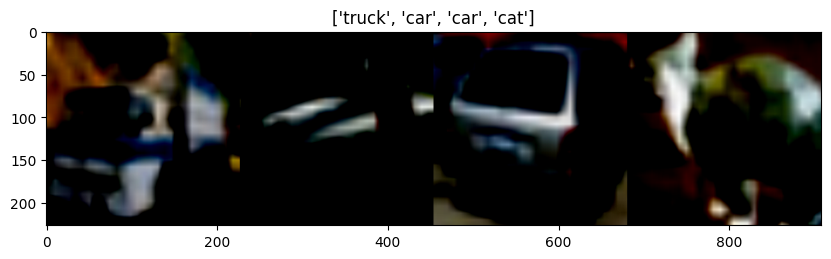

In [ ]:

from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

dataiter       = iter(train_loader)   # iter함수로 iteration 객체 가져오기
images, labels = next(dataiter)   # next함수로 다음 배치 1개 갖고오기

img   = utils.make_grid(images[:4], padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.title([classes[label] for label in labels[:4].tolist()])
plt.show()

In [ ]:
# CNN 만들기

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=8,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1 = nn.Linear(16 * 56 * 56, 64) # ???
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.pool(x)

        x = x.view(-1, 16 * 56 * 56)  # ???
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.log_softmax(x, dim=1)
        return x

model = CNN()

In [ ]:
# Loss & Optimizer

optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
# criterion = nn.CrossEntropyLoss()

In [ ]:
# 신경망 train


def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, cor / len(test_loader.dataset)))rect, len(test_loader.dataset),
        100. * correct

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.628023
Train Epoch: 1 [640/50000 (1%)]	Loss: 1.716175
Train Epoch: 1 [1280/50000 (3%)]	Loss: 1.384462
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.824738
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.640125
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.535812
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.587447
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.536957
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.902354
Train Epoch: 1 [5760/50000 (12%)]	Loss: 1.488364
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.500700
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1.793458
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.771223
Train Epoch: 1 [8320/50000 (17%)]	Loss: 1.766651
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1.467074
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.452699
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1.535288
Train Epoch: 1 [10880/50000 (22%)]	Loss: 1.538671
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1.704165
Train Epoch: 1 [12160/50000 (24%)]	Loss: 1.613710
Train Epoch: 1 [12800/50000 

<ipython-input-23-e351e593f487>:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 1.5581, Accuracy: 4344/10000 (43%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.580389
Train Epoch: 2 [640/50000 (1%)]	Loss: 1.378098
Train Epoch: 2 [1280/50000 (3%)]	Loss: 1.454612
Train Epoch: 2 [1920/50000 (4%)]	Loss: 1.490410
Train Epoch: 2 [2560/50000 (5%)]	Loss: 1.452973
Train Epoch: 2 [3200/50000 (6%)]	Loss: 1.450608
Train Epoch: 2 [3840/50000 (8%)]	Loss: 1.540544
Train Epoch: 2 [4480/50000 (9%)]	Loss: 1.680977
Train Epoch: 2 [5120/50000 (10%)]	Loss: 1.474720
Train Epoch: 2 [5760/50000 (12%)]	Loss: 1.528869
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.326410
Train Epoch: 2 [7040/50000 (14%)]	Loss: 1.297107
Train Epoch: 2 [7680/50000 (15%)]	Loss: 1.770511
Train Epoch: 2 [8320/50000 (17%)]	Loss: 1.638409
Train Epoch: 2 [8960/50000 (18%)]	Loss: 1.468266
Train Epoch: 2 [9600/50000 (19%)]	Loss: 1.640244
Train Epoch: 2 [10240/50000 (20%)]	Loss: 1.495298
Train Epoch: 2 [10880/50000 (22%)]	Loss: 1.322486
Train Epoch: 2 [11520/50000 (23%)]	Loss: 1.441077
Train Epoch: 2 [1

In [1]:
# other ver.
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#랜덤 시드 고정 : 학습을 위한 실험을 할 때 무작위성을 컨트롤하기 위해 사용.
torch.manual_seed(777) #cpu 연산 고정

if device == "cuda:0":
    torch.cuda.manual_seed_all(777) # 멀티 gpu 연산 무작위 고정

import time
import copy

from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
                                transforms.Resize(256),
                                transforms.RandomCrop(227), #227 * 227
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



In [2]:
batch_size = 64 #batch_size는 원하는 크기로 변경 가능.

cifar_train = datasets.CIFAR10('~/.data', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size, shuffle=True)

cifar_test = datasets.CIFAR10('~/.data', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=True)

data_loaders = {'train' : train_loader, 'val': test_loader}
total_batch = {'train' : len(train_loader), 'val': len(test_loader)}

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:20<00:00, 8384114.01it/s] 


Extracting /root/.data/cifar-10-python.tar.gz to /root/.data
Files already downloaded and verified


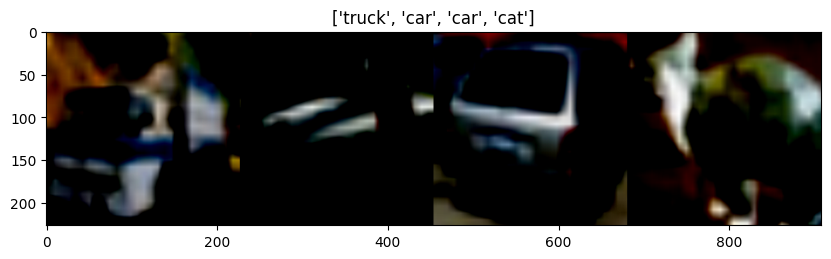

In [3]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

dataiter       = iter(train_loader)   # iter함수로 iteration 객체 가져오기
images, labels = next(dataiter)   # next함수로 다음 배치 1개 갖고오기

img   = utils.make_grid(images[:4], padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.title([classes[label] for label in labels[:4].tolist()])
plt.show()

In [49]:
class revised_Net(nn.Module):
  def __init__(self):
    super(revised_Net, self).__init__()

    self.conv1 = nn.Conv2d(3, 16, kernel_size=5)
    self.conv1_bn = nn.BatchNorm2d(16)


    self.conv2 = nn.Conv2d(16, 32, kernel_size=5)
    self.conv2_bn = nn.BatchNorm2d(32)

    self.conv3 = nn.Conv2d(32, 64, kernel_size=5)
    self.conv3_bn = nn.BatchNorm2d(64)

    self.mp = nn.MaxPool2d(2, stride = 4)

    self.fc = nn.Linear(64 * 2 * 2, 10)
    self.fc_bn = nn.BatchNorm1d(10)

  def forward(self, x):
    in_size = x.size(0)

    x = self.conv1_bn(F.relu(self.conv1(x)))
    x = self.mp(x)
    x = self.conv2_bn(F.relu(self.conv2(x)))
    x = self.mp(x)
    x = self.conv3_bn(F.relu(self.conv3(x)))
    x = self.mp(x)

    x = x.view(in_size, -1)

    x = self.fc_bn(F.relu(self.fc(x)))

    return F.log_softmax(x)

In [50]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [51]:
for epoch in range(1, 10):
    train(epoch)
    test()

 # 요게 걸리는 시간도 더 적고 현재까지는 베스트.

<ipython-input-49-011190fc7a8e>:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.905285
Train Epoch: 1 [640/50000 (1%)]	Loss: 2.054250
Train Epoch: 1 [1280/50000 (3%)]	Loss: 1.999837
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.760787
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.963014
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.987378
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.774679
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.859648
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.829799
Train Epoch: 1 [5760/50000 (12%)]	Loss: 2.035362
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.664123
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1.765706
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.608579
Train Epoch: 1 [8320/50000 (17%)]	Loss: 1.816857
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1.894367
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.979235
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1.588292
Train Epoch: 1 [10880/50000 (22%)]	Loss: 1.522318
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1.748011
Train Epoch: 1 [12160/50000 (24%)]	Loss: 1.654305
Train Epoch: 1 [12800/50000 

<ipython-input-50-252edfe1b05a>:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 1.5234, Accuracy: 4607/10000 (46%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.388618
Train Epoch: 2 [640/50000 (1%)]	Loss: 1.595190
Train Epoch: 2 [1280/50000 (3%)]	Loss: 1.692795
Train Epoch: 2 [1920/50000 (4%)]	Loss: 1.365736
Train Epoch: 2 [2560/50000 (5%)]	Loss: 1.507789
Train Epoch: 2 [3200/50000 (6%)]	Loss: 1.320758
Train Epoch: 2 [3840/50000 (8%)]	Loss: 1.436403
Train Epoch: 2 [4480/50000 (9%)]	Loss: 1.426679
Train Epoch: 2 [5120/50000 (10%)]	Loss: 1.416359
Train Epoch: 2 [5760/50000 (12%)]	Loss: 1.540315
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.347553
Train Epoch: 2 [7040/50000 (14%)]	Loss: 1.306371
Train Epoch: 2 [7680/50000 (15%)]	Loss: 1.519348
Train Epoch: 2 [8320/50000 (17%)]	Loss: 1.649439
Train Epoch: 2 [8960/50000 (18%)]	Loss: 1.231632
Train Epoch: 2 [9600/50000 (19%)]	Loss: 1.401915
Train Epoch: 2 [10240/50000 (20%)]	Loss: 1.294439
Train Epoch: 2 [10880/50000 (22%)]	Loss: 1.257353
Train Epoch: 2 [11520/50000 (23%)]	Loss: 1.408873
Train Epoch: 2 [1